In [1]:
import os
import rioxarray as rxr
from rioxarray.merge import merge_arrays
import matplotlib.pyplot as plt
import requests

In [2]:
data_folder = 'data'
output_folder = 'output'
if not os.path.exists(data_folder):
    os.mkdir(data_folder)
if not os.path.exists(output_folder):
    os.mkdir(output_folder)

In [3]:
def download(url):
    filename = os.path.join(data_folder, os.path.basename(url))
    if not os.path.exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

srtm_tiles = [
  'N27E086.hgt',
  'N27E087.hgt',
  'N28E086.hgt',
  'N28E087.hgt'
]

# data_url = 'https://github.com/spatialthoughts/python-dataviz-web/releases/' \
#   'download/srtm/'
data_url='https://github.com/spatialthoughts/python-dataviz-web/releases/download/srtm/'
for tile in srtm_tiles:
  url = '{}/{}'.format(data_url, tile)
  download(url)
# https://github.com/spatialthoughts/python-dataviz-web/releases/download/srtm/N27E086.hgt

In [4]:
filename = 'N28E087.hgt'
file_path = os.path.join(data_folder, filename)
rds = rxr.open_rasterio(file_path)

In [5]:
rds

<xarray.DataArray (band: 1, y: 3601, x: 3601)> Size: 26MB
[12967201 values with dtype=int16]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 29kB 87.0 87.0 87.0 87.0 ... 88.0 88.0 88.0 88.0
  * y            (y) float64 29kB 29.0 29.0 29.0 29.0 ... 28.0 28.0 28.0 28.0
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Point
    _FillValue:     -32768
    scale_factor:   1.0
    add_offset:     0.0
    units:          m

In [6]:
rds.values

array([[[5217, 5211, 5208, ..., 5097, 5098, 5089],
        [5206, 5201, 5200, ..., 5080, 5075, 5069],
        [5199, 5194, 5191, ..., 5063, 5055, 5048],
        ...,
        [5347, 5345, 5343, ..., 5747, 5750, 5757],
        [5338, 5338, 5336, ..., 5737, 5740, 5747],
        [5332, 5331, 5332, ..., 5734, 5736, 5744]]],
      shape=(1, 3601, 3601), dtype=int16)

In [7]:
# for value in rds.values.flat:
    # print(value)
    # dont print 3601 values will return


In [8]:
rds.coords

Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 29kB 87.0 87.0 87.0 87.0 ... 88.0 88.0 88.0 88.0
  * y            (y) float64 29kB 29.0 29.0 29.0 29.0 ... 28.0 28.0 28.0 28.0
    spatial_ref  int64 8B 0

In [9]:
print('CRS:', rds.rio.crs)
print('Resolution:', rds.rio.resolution())
print('Bounds:', rds.rio.bounds())
print('Width:', rds.rio.width)
print('Height:', rds.rio.height)

CRS: EPSG:4326
Resolution: (0.0002777777777777778, -0.0002777777777777778)
Bounds: (86.99986111111112, 27.999861111111112, 88.00013888888888, 29.000138888888888)
Width: 3601
Height: 3601


In [10]:
band1 = rds.sel(band=1)
band1


<xarray.DataArray (y: 3601, x: 3601)> Size: 26MB
array([[5217, 5211, 5208, ..., 5097, 5098, 5089],
       [5206, 5201, 5200, ..., 5080, 5075, 5069],
       [5199, 5194, 5191, ..., 5063, 5055, 5048],
       ...,
       [5347, 5345, 5343, ..., 5747, 5750, 5757],
       [5338, 5338, 5336, ..., 5737, 5740, 5747],
       [5332, 5331, 5332, ..., 5734, 5736, 5744]],
      shape=(3601, 3601), dtype=int16)
Coordinates:
    band         int64 8B 1
  * x            (x) float64 29kB 87.0 87.0 87.0 87.0 ... 88.0 88.0 88.0 88.0
  * y            (y) float64 29kB 29.0 29.0 29.0 29.0 ... 28.0 28.0 28.0 28.0
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Point
    _FillValue:     -32768
    scale_factor:   1.0
    add_offset:     0.0
    units:          m

In [11]:
datasets = []
for tile in srtm_tiles:
    path = os.path.join(data_folder, tile)
    rds = rxr.open_rasterio(path)
    band = rds.sel(band=1)
    datasets.append(band)

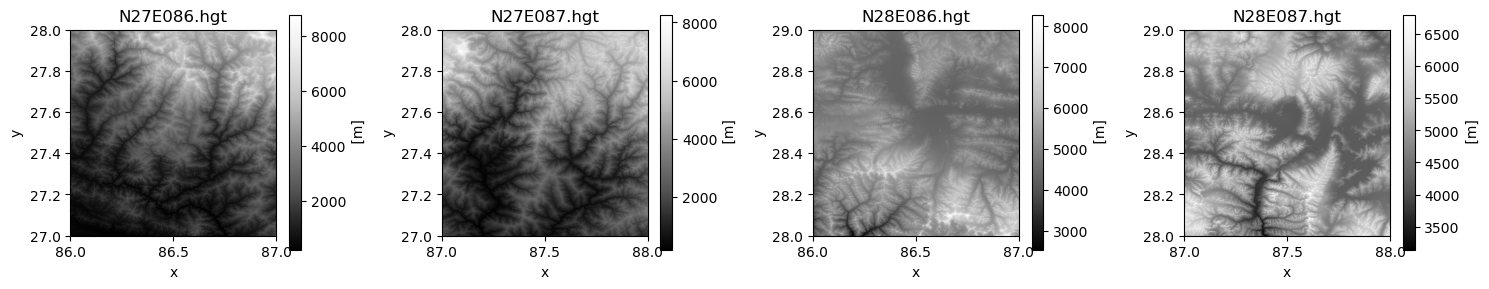

In [12]:
fig, axes = plt.subplots(1, 4)
fig.set_size_inches(15,3)
for index, ax in enumerate(axes.flat):
    da = datasets[index]
    im = da.plot.imshow(ax=ax, cmap='Greys_r')
    filename = srtm_tiles[index]
    ax.set_title(filename)
    ax.set_aspect('equal') # maintain aspect ratio

plt.tight_layout()
plt.show()

In [13]:
# fig, axes = plt.subplots(1, 4)
# type(axes) 

In [14]:
# fig, axes = plt.subplots(2, 4)

# for i, ax in enumerate(axes.flat):
#     ax.set_title(f"Subplot {i}")

In [15]:
# fig, axes = plt.subplots(2, 3)
# type(axes)  # numpy.ndarray
# axes.shape 

In [16]:
# for i,ax in enumerate(axes.flat):
#     print(ax.set_title(f"Subplot {i}"))
    

In [17]:
# for i, ax in enumerate(axes.flat):
#     ax.set_title(f"Subplot {i}")

In [18]:
# fig, axes = plt.subplots(1, 4)

# for i, ax in enumerate(axes.flat):
#     ax.set_title(f"Subplot {i}")

In [19]:
merged = merge_arrays(datasets, method='first')
merged

<xarray.DataArray (y: 7201, x: 7201)> Size: 104MB
array([[4916, 4926, 4931, ..., 5097, 5098, 5089],
       [4919, 4932, 4928, ..., 5080, 5075, 5069],
       [4919, 4928, 4935, ..., 5063, 5055, 5048],
       ...,
       [ 368,  368,  366, ..., 1905, 1919, 1937],
       [ 364,  364,  362, ..., 1913, 1930, 1944],
       [ 360,  359,  357, ..., 1918, 1930, 1942]],
      shape=(7201, 7201), dtype=int16)
Coordinates:
  * x            (x) float64 58kB 86.0 86.0 86.0 86.0 ... 88.0 88.0 88.0 88.0
  * y            (y) float64 58kB 29.0 29.0 29.0 29.0 ... 27.0 27.0 27.0 27.0
    band         int64 8B 1
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Point
    _FillValue:     -32768
    scale_factor:   1.0
    add_offset:     0.0
    units:          m

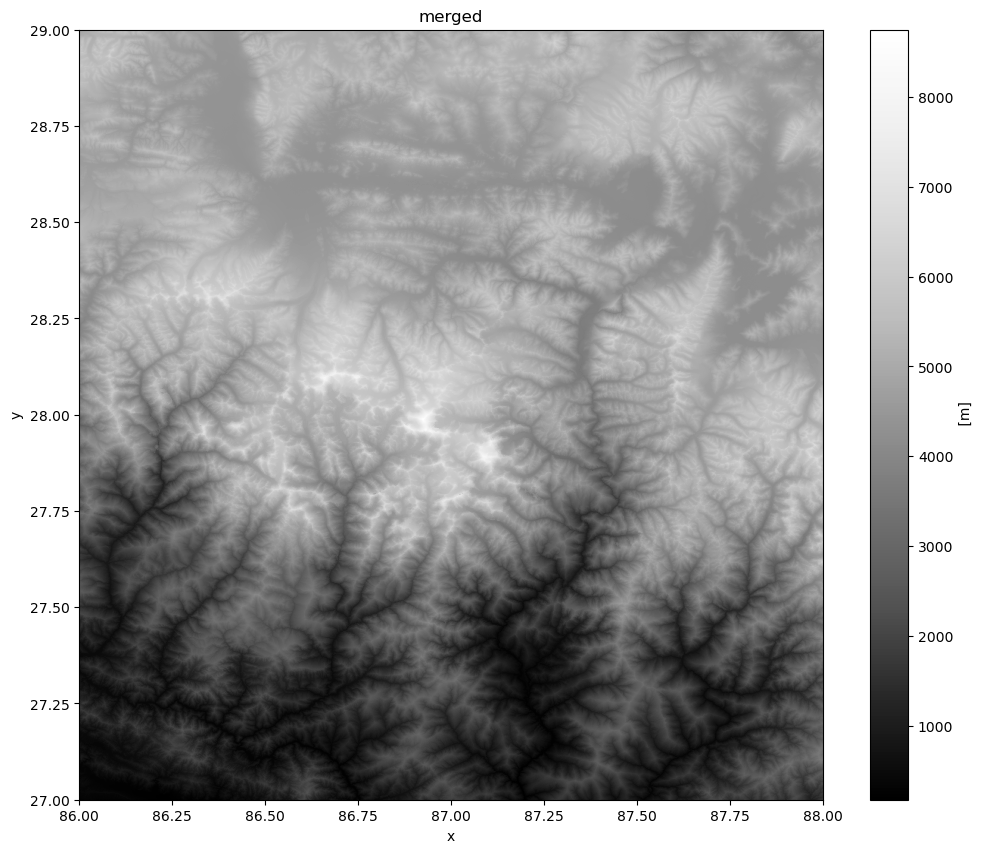

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 10)
merged.plot.imshow(ax=ax, cmap='Greys_r')
ax.set_title('merged')
plt.show()

In [21]:
output_file = 'merged.tif'
output_path = os.path.join(output_folder, output_file)
merged.rio.to_raster(output_path, driver='COG')

In [22]:
max_da = merged.where(merged==merged.max(), drop=True)
max_da

<xarray.DataArray (y: 1, x: 1)> Size: 4B
array([[8748.]], dtype=float32)
Coordinates:
  * x            (x) float64 8B 86.93
  * y            (y) float64 8B 27.99
    band         int64 8B 1
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Point
    _FillValue:     -32768
    scale_factor:   1.0
    add_offset:     0.0
    units:          m

In [23]:
max_da = merged.where(merged==merged.max(), drop=True).squeeze()
max_da

<xarray.DataArray ()> Size: 4B
array(8748., dtype=float32)
Coordinates:
    x            float64 8B 86.93
    y            float64 8B 27.99
    band         int64 8B 1
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Point
    _FillValue:     -32768
    scale_factor:   1.0
    add_offset:     0.0
    units:          m

In [24]:
max_x = max_da.x.values
max_y = max_da.y.values
max_elev = int(max_da.values)
print(max_x, max_y, max_elev)

86.92555555555556 27.988888888888887 8748


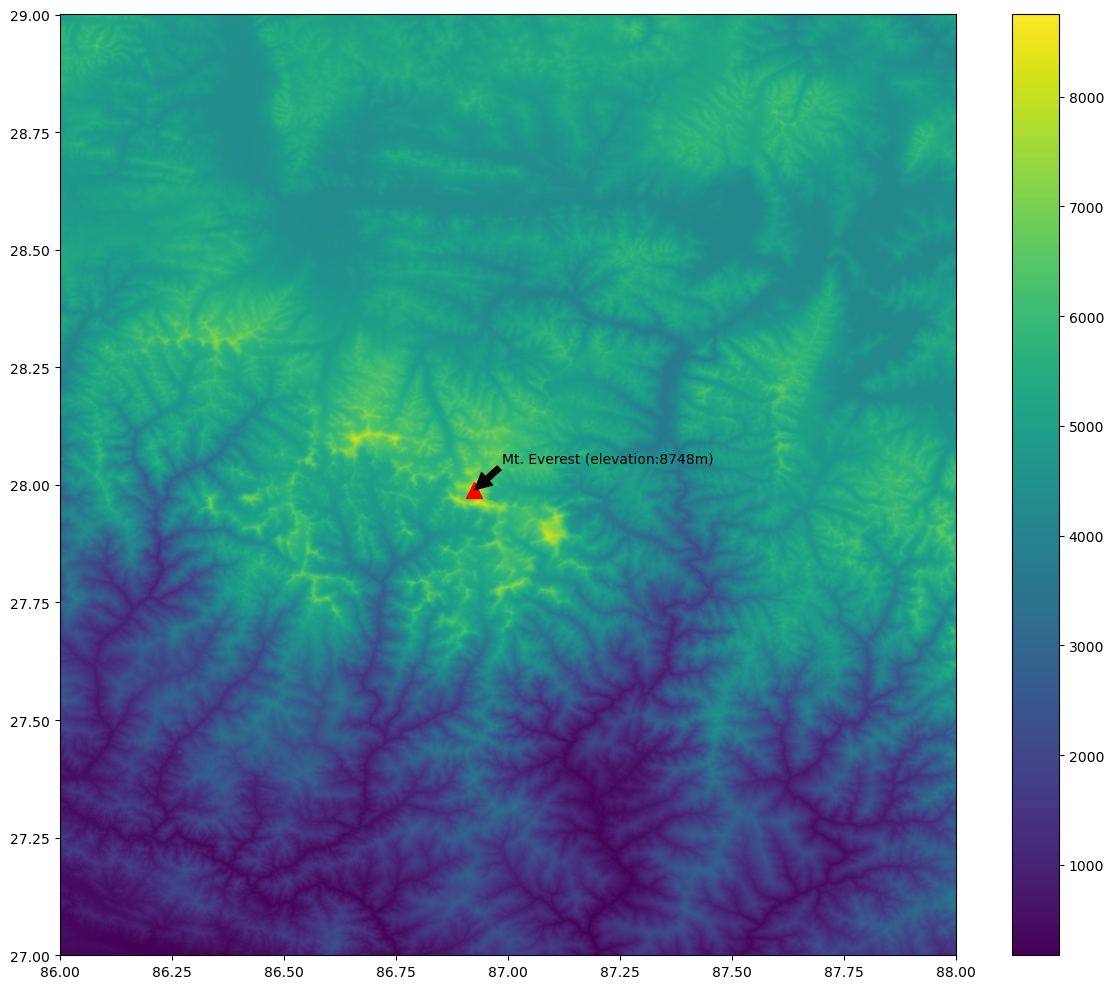

In [29]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(12, 10)
merged.plot.imshow(ax=ax, cmap='viridis', add_labels=False)
ax.plot(max_x, max_y, '^r', markersize=11)
ax.annotate('Mt. Everest (elevation:{}m)'.format(max_elev),
            xy=(max_x, max_y), xycoords='data',
            xytext=(20, 20), textcoords='offset points',
            # arrowprops={'arrowstyle':'->', 'color':'black'}
            arrowprops=dict(facecolor='black', shrink=0.01)
            )
plt.tight_layout()
plt.show()

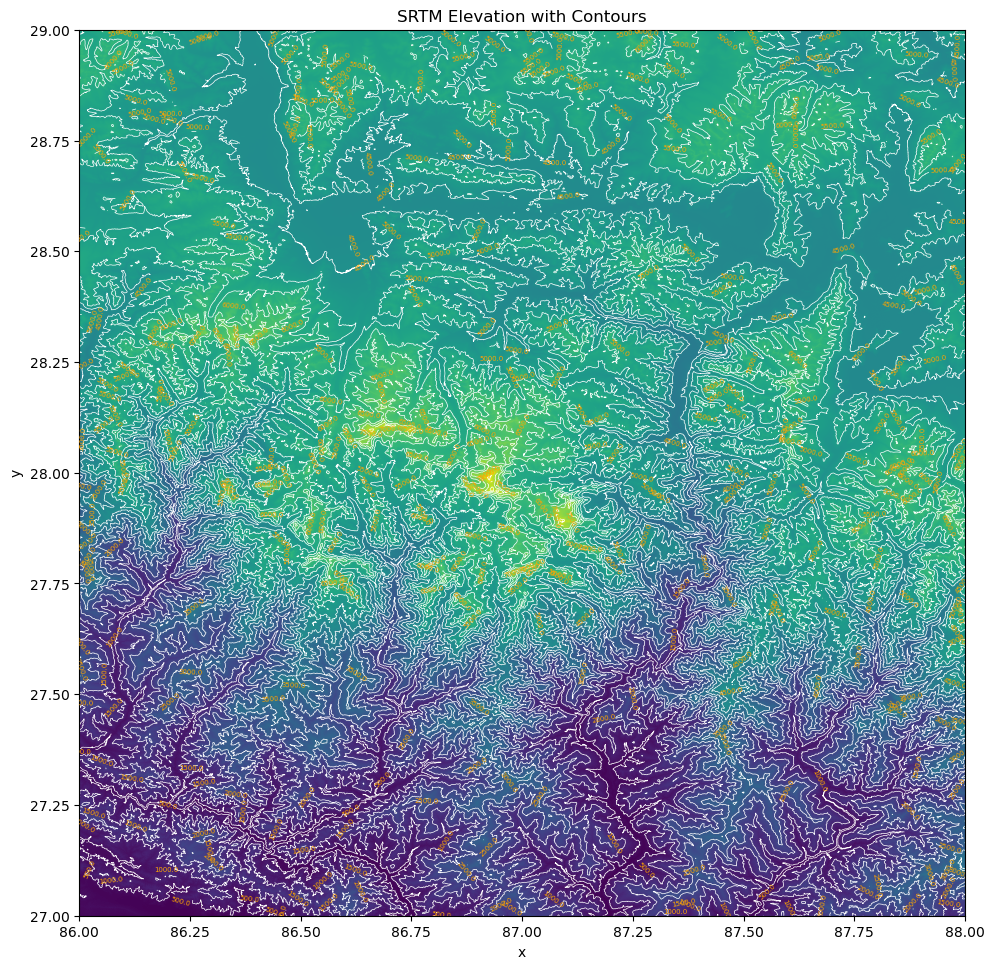

In [37]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10, 10)
merged.plot.imshow(
    ax=ax,
    cmap='viridis',
    add_labels=False,
    add_colorbar=False)
# Overlay contour lines
contour =merged.plot.contour(ax=ax, colors='white', levels=20, linewidths=0.5)
# Add contour labels
ax.clabel(contour, inline=True, fontsize=5, fmt="%.1f",colors='orange')

# Optional: Enhance the plot
ax.set_title("SRTM Elevation with Contours")
ax.set_aspect('equal')
# ax.set_axis_off()
plt.tight_layout()
plt.show()

...........Rivers of India...................


In [38]:
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import requests
import zipfile

In [39]:
data_folder = 'data'
output_folder = 'output'

if not os.path.exists(data_folder):
    os.mkdir(data_folder)
if not os.path.exists(output_folder):
    os.mkdir(output_folder)

In [57]:
def download(url):
    filename = os.path.join(data_folder, os.path.basename(url))
    if not os.path.exists(filename):
      with requests.get(url, stream=True, allow_redirects=True) as r:
          with open(filename, 'wb') as f:
              for chunk in r.iter_content(chunk_size=8192):
                  f.write(chunk)
      print('Downloaded', filename)


# data_url = 'https://github.com/spatialthoughts/python-dataviz-web/releases/download/'
data_url='https://github.com/spatialthoughts/python-dataviz-web/releases/download/hydrosheds/hydrorivers_100.gpkg'

# This is a subset of the main HydroRivers dataset of all
# rivers having `UPLAND_SKM` value  greater than 100 sq. km.
hydrorivers_file = 'hydrorivers_100.gpkg'
hydrorivers_url = data_url + 'hydrosheds/'

countries_file = 'ne_10m_admin_0_countries_ind.zip'
# countries_url = data_url + 'naturalearth/'
countries_url='https://github.com/spatialthoughts/python-dataviz-web/releases/download/naturalearth/'

download(data_url)
# download(countries_url)
# download(hydrorivers_url + hydrorivers_file)
# download(countries_url + countries_file)

Downloaded data\hydrorivers_100.gpkg


In [43]:
countries_filepath = os.path.join(data_folder, countries_file)

In [44]:
country_gdf = gpd.read_file(countries_filepath)
print(sorted(country_gdf.SOVEREIGNT.unique()))

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bir Tawil', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brazilian Island', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Democratic Republic of the Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Federated States of Micronesia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', '

In [48]:
print(list(country_gdf.columns))
# Unique number of country names total=200
country_gdf['SOVEREIGNT'].nunique() 

['ADM0_A3_IN', 'featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3', 'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN', 'ADM0_A3', 'GEOU_DIF', 'GEOUNIT', 'GU_A3', 'SU_DIF', 'SUBUNIT', 'SU_A3', 'BRK_DIFF', 'NAME', 'NAME_LONG', 'BRK_A3', 'BRK_NAME', 'BRK_GROUP', 'ABBREV', 'POSTAL', 'FORMAL_EN', 'FORMAL_FR', 'NAME_CIAWF', 'NOTE_ADM0', 'NOTE_BRK', 'NAME_SORT', 'NAME_ALT', 'MAPCOLOR7', 'MAPCOLOR8', 'MAPCOLOR9', 'MAPCOLOR13', 'POP_EST', 'POP_RANK', 'POP_YEAR', 'GDP_MD', 'GDP_YEAR', 'ECONOMY', 'INCOME_GRP', 'FIPS_10', 'ISO_A2', 'ISO_A2_EH', 'ISO_A3', 'ISO_A3_EH', 'ISO_N3', 'ISO_N3_EH', 'UN_A3', 'WB_A2', 'WB_A3', 'WOE_ID', 'WOE_ID_EH', 'WOE_NOTE', 'ADM0_ISO', 'ADM0_DIFF', 'ADM0_TLC', 'ADM0_A3_US', 'ADM0_A3_FR', 'ADM0_A3_RU', 'ADM0_A3_ES', 'ADM0_A3_CN', 'ADM0_A3_TW', 'ADM0_A3_NP', 'ADM0_A3_PK', 'ADM0_A3_DE', 'ADM0_A3_GB', 'ADM0_A3_BR', 'ADM0_A3_IL', 'ADM0_A3_PS', 'ADM0_A3_SA', 'ADM0_A3_EG', 'ADM0_A3_MA', 'ADM0_A3_PT', 'ADM0_A3_AR', 'ADM0_A3_JP', 'ADM0_A3_KO', 'ADM0_A3_VN', 'ADM0_A3_TR', 'AD

200

In [52]:
cols_starting_with_c = [col for col in country_gdf.columns if col.lower().startswith('c')]
gdf_c = country_gdf[cols_starting_with_c]
gdf_c




CONTINENT
0                       Asia
1                       Asia
2              South America
3              South America
4              South America
..                       ...
243                     Asia
244  Seven seas (open ocean)
245                     Asia
246                  Oceania
247                     Asia

[248 rows x 1 columns]

In [54]:
print(country_gdf['TYPE'])


0      Sovereign country
1      Sovereign country
2      Sovereign country
3      Sovereign country
4      Sovereign country
             ...        
243        Indeterminate
244           Dependency
245              Country
246           Dependency
247        Indeterminate
Name: TYPE, Length: 248, dtype: object


In [53]:
country = 'India'

In [55]:
selected_country = country_gdf[
    (country_gdf['SOVEREIGNT'] == country) &
    (country_gdf['TYPE'] != 'Dependency')
]
selected_country

ADM0_A3_IN       featurecla  scalerank  LABELRANK SOVEREIGNT SOV_A3  \
8        IND  Admin-0 country          0          2      India    IND   

   ADM0_DIF  LEVEL               TYPE TLC  ... FCLASS_TR FCLASS_ID  FCLASS_PL  \
8         0      2  Sovereign country   1  ...      None      None       None   

  FCLASS_GR FCLASS_IT  FCLASS_NL FCLASS_SE FCLASS_BD  FCLASS_UA  \
8      None      None       None      None      None       None   

                                            geometry  
8  MULTIPOLYGON (((78.91769 33.38626, 78.96499 33...  

[1 rows x 169 columns]

In [58]:
hydrorivers_filepath =r'D:\2025\Geopython\python_foundation\python_foundation\data\hydrorivers_100.gpkg'
hydrorivers_filepath

'D:\\2025\\Geopython\\python_foundation\\python_foundation\\data\\hydrorivers_100.gpkg'

In [59]:
river_gdf = gpd.read_file(hydrorivers_filepath, mask=selected_country)
river_gdf

HYRIV_ID  NEXT_DOWN  MAIN_RIV  LENGTH_KM  DIST_DN_KM  DIST_UP_KM  \
0      41128052   41129638  41134791       1.85        24.7        34.1   
1      41128050   41128391  41128391       3.05         1.4        24.8   
2      41127327   41128052  41134791       0.46        26.6        32.3   
3      41127141   41127327  41134791       4.63        27.0        31.8   
4      41125252   41127141  41134791       1.39        31.7        27.2   
...         ...        ...       ...        ...         ...         ...   
74212  40717917   40718479  41067217       0.61      1521.7        19.9   
74213  40717702   40718287  41067217       0.61      1522.3        43.9   
74214  40717480   40717702  41067217       0.46      1522.7        43.4   
74215  40717278   40717480  41067217       0.61      1523.4        42.8   
74216  40717105   40717278  41067217       1.23      1524.0        42.2   

       CATCH_SKM  UPLAND_SKM  ENDORHEIC  DIS_AV_CMS  ORD_STRA  ORD_CLAS  \
0           3.98       490.4          0       1.238         3         2   
1          12.34       128.5          0       0.420         2         1   
2           0.40       472.3          0       1.229         3         2   
3          18.90       446.3          0       1.145         3         2   
4           1.99       305.4          0       0.874         3         2   
...          ...         ...        ...         ...       ...       ...   
74212       0.75       105.2          0       4.378         3         4   
74213       0.38       687.4          0      27.885         4         3   
74214       0.38       669.9          0      27.102         4         3   
74215       2.81       666.4          0      27.030         4         3   
74216       2.06       654.2          0      26.551         4         3   

       ORD_FLOW   HYBAS_L12                                           geometry  
0             6  4121540480  MULTILINESTRING ((69.48125 22.00625, 69.48125 ...  
1             7  4120032490  MULTILINESTRING ((69.22292 22.00625, 69.21875 ...  
2             6  4121540480  MULTILINESTRING ((69.48125 22.01042, 69.48125 ...  
3             6  4121540480  MULTILINESTRING ((69.48125 22.05208, 69.48125 ...  
4             7  4121539560  MULTILINESTRING ((69.48125 22.06458, 69.48125 ...  
...         ...         ...                                                ...  
74212         6  4120789890  MULTILINESTRING ((96.35625 29.25625, 96.35208 ...  
74213         5  4120789880  MULTILINESTRING ((96.31875 29.26042, 96.32292 ...  
74214         5  4120789880  MULTILINESTRING ((96.31875 29.26458, 96.31875 ...  
74215         5  4120789880  MULTILINESTRING ((96.31458 29.26875, 96.31875 ...  
74216         5  4120789880  MULTILINESTRING ((96.30625 29.27708, 96.31458 ...  

[74217 rows x 15 columns]

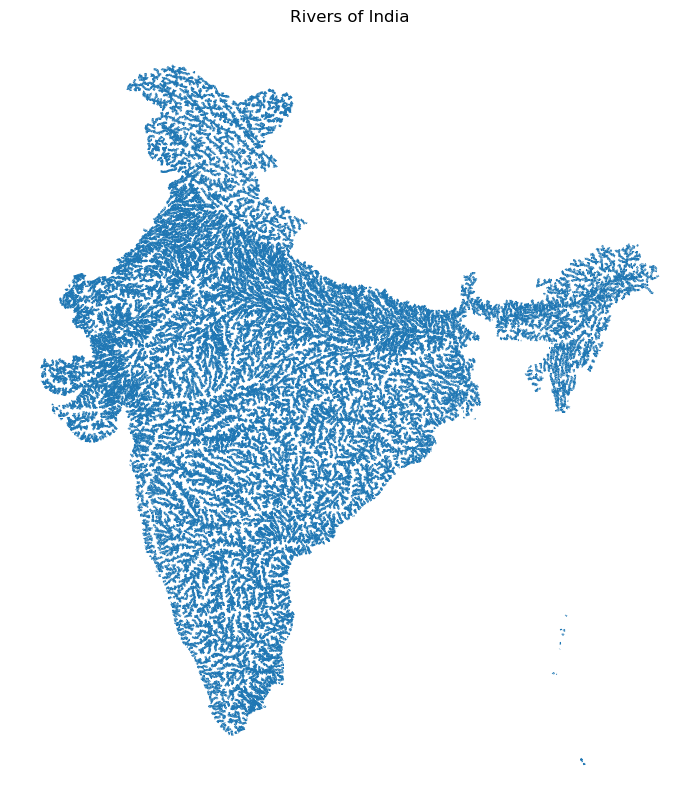

In [60]:
fig, ax = plt.subplots(figsize=(10, 10))
title = f'Rivers of {country}'
river_gdf.plot(ax=ax)
ax.set_title(title)
ax.set_axis_off()
plt.show()

In [61]:
original_min = 300
original_max = 10000
target_min = 0.2
target_max = 0.9
scaled = (river_gdf['UPLAND_SKM'] - original_min) / (original_max - original_min)
river_gdf['width'] = scaled.clip(0, 1) * (target_max - target_min) + target_min
river_gdf_final = river_gdf.sort_values(['UPLAND_SKM', 'width'])[
    ['MAIN_RIV', 'UPLAND_SKM', 'width', 'geometry']]
river_gdf_final

MAIN_RIV  UPLAND_SKM  width  \
1321   41148808       100.1    0.2   
2229   40795889       100.1    0.2   
6340   41067217       100.1    0.2   
8057   41067217       100.1    0.2   
11270  41067217       100.1    0.2   
...         ...         ...    ...   
59812  41067217    942435.1    0.9   
59829  41067217    942452.4    0.9   
59826  41067217    942477.6    0.9   
59828  41067217    942487.9    0.9   
59817  41067217    942748.9    0.9   

                                                geometry  
1321   MULTILINESTRING ((70.97083 21.68333, 70.96458 ...  
2229   MULTILINESTRING ((71.66042 27.60208, 71.66458 ...  
6340   MULTILINESTRING ((80.60208 24.20208, 80.60625 ...  
8057   MULTILINESTRING ((79.34375 24.66458, 79.34375 ...  
11270  MULTILINESTRING ((80.56042 27.75208, 80.56042 ...  
...                                                  ...  
59812  MULTILINESTRING ((88.71042 24.31042, 88.71458 ...  
59829  MULTILINESTRING ((88.73958 24.24375, 88.73958 ...  
59826  MULTILINESTRING ((88.73958 24.23958, 88.73958 ...  
59828  MULTILINESTRING ((88.73958 24.22292, 88.73958 ...  
59817  MULTILINESTRING ((88.73958 24.21042, 88.76042 ...  

[74217 rows x 4 columns]

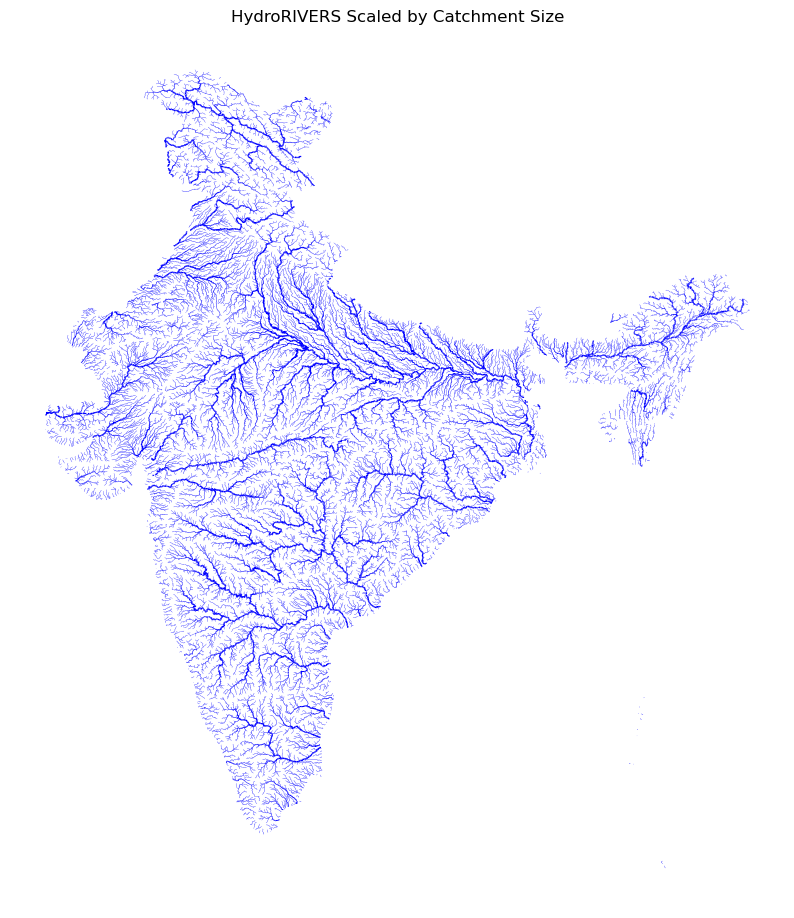

In [62]:
fig, ax = plt.subplots(figsize=(10, 12))
river_gdf_final.plot(ax=ax, linewidth=river_gdf_final['width'], color='blue')
plt.title("HydroRIVERS Scaled by Catchment Size")
plt.axis('off')
plt.show()

In [81]:
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors

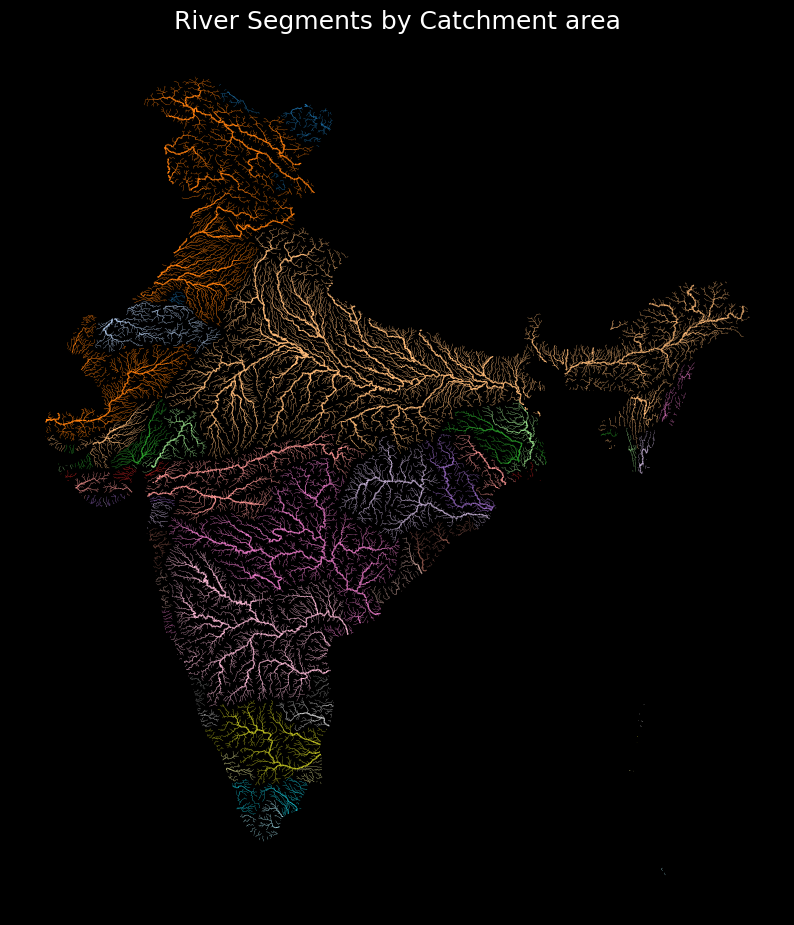

In [75]:
fig, ax = plt.subplots(figsize=(10, 12))
# Set the background color of the figure and axis to black
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

river_gdf_final.plot(
    ax=ax,
    column='MAIN_RIV',       # Use this column for coloring
    categorical=True,        # Treat it as categorical data
    # legend=True,             # Show legend for categories
    linewidth=river_gdf_final['width'],  # Keep line widths scaled
    cmap='tab20'             # Good categorical colormap with distinct colors
)
plt.title("River Segments by Catchment area", color='white', fontsize=18)
plt.axis('off')
plt.show()


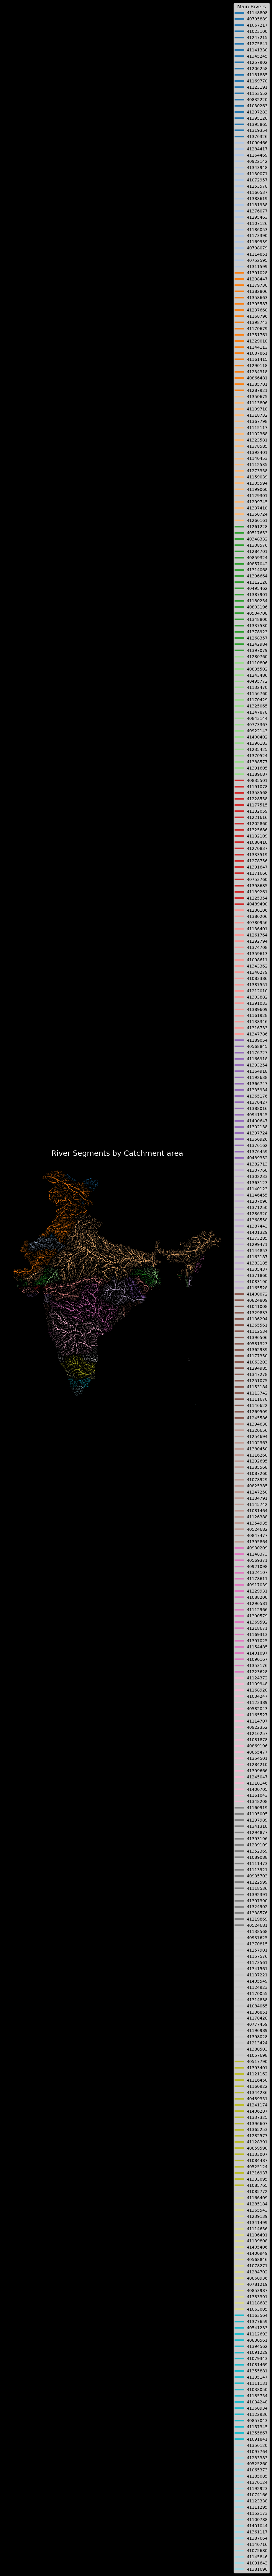

In [82]:
fig, ax = plt.subplots(figsize=(10, 12))
# Set the background color of the figure and axis to black
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

river_gdf_final.plot(
    ax=ax,
    column='MAIN_RIV',       # Use this column for coloring
    categorical=True,        # Treat it as categorical data
    # legend=True,             # Show legend for categories
    linewidth=river_gdf_final['width'],  # Keep line widths scaled
    cmap='tab20'             # Good categorical colormap with distinct colors
)
plt.title("River Segments by Catchment area", color='white', fontsize=18)
plt.axis('off')
# plt.show()
# Create custom legend

# Get unique river names
unique_rivers = river_gdf_final['MAIN_RIV'].unique()
# norm = mcolors.Normalize(vmin=0, vmax=len(unique_rivers) - 1)
# category_colors = {cat: cmap(norm(i)) for i, cat in enumerate(unique_rivers)}
# # Get the colormap colors corresponding to unique categories
# cmap=plt.get_cmap('tab20')  # or 'tab20' or whatever cmap you use
# unique_rivers = river_gdf_final['MAIN_RIV'].unique()
# colors = [cmap(i / len(unique_rivers)) for i in range(len(unique_rivers))]


# # Filter only those present in the data
# rivers_to_legend = [r for r in unique_rivers]

# # Create legend handles for just these rivers
# legend_handles = [
#     Line2D([0], [0], color=category_colors[r], lw=4) for r in rivers_to_legend
# ]

# # Add legend
# ax.legend(
#     legend_handles,
#     rivers_to_legend,
#     title="Main Rivers",
#     loc='center left',
#     bbox_to_anchor=(1, 0.5),
#     fontsize=10,
#     title_fontsize=12
# )
# plt.show()


In [83]:
# Get unique river names
unique_rivers = river_gdf_final['MAIN_RIV'].unique()
unique_rivers

array([41148808, 40795889, 41067217, 41023100, 41247215, 41275841,
       41141330, 41345245, 41257902, 41206258, 41181885, 41169770,
       41123191, 41153552, 40832220, 41030263, 41297283, 41395120,
       41395865, 41319354, 41376326, 41090466, 41284417, 41164469,
       40922142, 41343948, 41130071, 41072957, 41253578, 41166537,
       41388619, 41181938, 41376077, 41295463, 41107126, 41186053,
       41173390, 41169939, 40798079, 41114851, 40752595, 41311599,
       41391028, 41208447, 41179730, 41382806, 41358663, 41395587,
       41237660, 41168796, 41398743, 41170679, 41351761, 41329018,
       41144113, 41087861, 41161415, 41290118, 41234318, 40866481,
       41385781, 41287921, 41350675, 41113806, 41109718, 41318732,
       41367798, 41115117, 41102368, 41323581, 41378585, 41392401,
       41140453, 41112535, 41273358, 41159039, 41305594, 41199060,
       41129301, 41299745, 41337418, 41350724, 41266161, 41261228,
       40517653, 40348332, 41308576, 41284701, 40859324, 40857